In [1]:
#Importar librerías
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import scipy.optimize as opt #Importar el módulo optimize de la librería scipy

In [48]:
def get_adj_closes(tickers,start_date=None, end_date=None):
    #Fecha de inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    #Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    #Unicamente necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    #Se ordenan de forma ascendente
    closes.sort_index(inplace=True)
    return closes

In [49]:
#Descargar datos de emisoras 2020
emisoras = pd.read_csv('Emisoras2020.csv', header=0)
emisoras = np.array(emisoras).flatten()

In [50]:
#Descargar datos
# names = ['ALSEA.MX','CEMEXCPO.MX','GENTERA.MX']
start = '2010-01-01'

In [51]:
#importar datos
closes = get_adj_closes(emisoras,start_date=start)

In [52]:
import pickle

#Guardar resultados
#pickle.dump(closes,open('closes.sav','wb'))

#Cargar resultados
#closes = pickle.load(open('closes.sav', 'rb'))

In [53]:
#Delimitar datos
closes = closes[closes.index.year >= 2015]

In [54]:
#Seleccionar emisoras que contengan los suficientes datos
emisoras = [i for i in emisoras if closes[i].isnull().sum() < 2]

In [55]:
len(emisoras)

88

In [56]:
#Filtrar cierres de emisoras
closes = closes.loc[:,emisoras].dropna()
closes.head()

Symbols,AC.MX,ACCELSAB.MX,AEROMEX.MX,AGUA.MX,ALEATIC.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,AMXL.MX,ANB.MX,...,SORIANAB.MX,TEAKCPO.MX,TLEVISACPO.MX,TMMA.MX,URBI.MX,VALUEGFO.MX,VESTA.MX,VITROA.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,79.731155,9.3,19.389999,25.805101,22.313431,31.753469,18.269905,38.215240,13.928421,1669.947998,...,38.029999,15.8727,97.431053,4.93,1496.560059,93.781334,22.998337,33.985828,13.03,27.267859
2015-01-05,78.486710,9.3,20.030001,25.719084,22.054073,29.879787,17.154562,37.353245,13.773661,1602.017944,...,37.990002,15.4759,95.763977,4.80,1496.560059,96.460793,21.458525,33.985828,12.89,26.443434
2015-01-06,78.591141,9.3,19.570000,25.314804,22.434465,30.474607,17.065729,37.975796,13.704878,1602.017944,...,38.000000,15.7735,95.159546,4.80,1496.560059,98.896675,22.109037,32.052944,12.89,26.709375
2015-01-07,78.834808,9.3,19.430000,25.452431,22.979116,31.168564,17.045990,39.556126,13.859639,1602.017944,...,38.049999,15.4759,95.081551,4.60,1496.560059,98.896675,22.504282,33.733288,12.79,27.134884
2015-01-08,79.121986,9.3,20.840000,25.495438,23.376801,32.050880,17.312490,39.987122,14.126170,1602.017944,...,39.520000,15.4759,95.861481,4.65,1496.560059,98.896675,22.561922,33.733288,12.67,26.966455


In [57]:
#Rendimientos diarios
ret = closes.pct_change(1).dropna()
ret.head()

Symbols,AC.MX,ACCELSAB.MX,AEROMEX.MX,AGUA.MX,ALEATIC.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,AMXL.MX,ANB.MX,...,SORIANAB.MX,TEAKCPO.MX,TLEVISACPO.MX,TMMA.MX,URBI.MX,VALUEGFO.MX,VESTA.MX,VITROA.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.015608,0.0,0.033007,-0.003333,-0.011623,-0.059007,-0.061048,-0.022556,-0.011111,-0.040678,...,-0.001052,-0.024999,-0.017110,-0.026369,0.0,0.028571,-0.066953,0.000000,-0.010744,-0.030234
2015-01-06,0.001331,0.0,-0.022966,-0.015719,0.017248,0.019907,-0.005178,0.016667,-0.004994,0.000000,...,0.000263,0.019230,-0.006312,0.000000,0.0,0.025253,0.030315,-0.056873,0.000000,0.010057
2015-01-07,0.003100,0.0,-0.007154,0.005437,0.024277,0.022772,-0.001157,0.041614,0.011292,0.000000,...,0.001316,-0.018867,-0.000820,-0.041667,0.0,0.000000,0.017877,0.052424,-0.007758,0.015931
2015-01-08,0.003643,0.0,0.072568,0.001690,0.017306,0.028308,0.015634,0.010896,0.019231,0.000000,...,0.038633,0.000000,0.008203,0.010870,0.0,0.000000,0.002561,0.000000,-0.009382,-0.006207
2015-01-09,0.009019,0.0,-0.021113,0.004049,-0.009246,-0.011135,0.007982,-0.016527,0.012173,0.000000,...,-0.018219,0.000000,-0.001526,-0.012903,0.0,-0.019704,-0.006934,0.002591,0.000789,-0.016765


In [58]:
#Se siguen eliminando emisoras atípicas (no tan bursátiles)
emisoras = [i for i in emisoras if ret[i][ret[i]==0].count() < 300]
len(emisoras)

49

In [59]:
#Graficar emisoras bursatiles
#Filtrar cierres de emisoras
closes = closes.loc[:,emisoras].dropna()
closes.head()

Symbols,AC.MX,AEROMEX.MX,AGUA.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,AMXL.MX,ARA.MX,ASURB.MX,AUTLANB.MX,...,PE&OLES.MX,PINFRA.MX,RA.MX,SIMECB.MX,SORIANAB.MX,TLEVISACPO.MX,VESTA.MX,VITROA.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,79.731155,19.389999,25.805101,31.753469,18.269905,38.215240,13.928421,5.736579,175.280350,13.843065,...,241.311752,156.201431,65.374748,41.611912,38.029999,97.431053,22.998337,33.985828,13.03,27.267859
2015-01-05,78.486710,20.030001,25.719084,29.879787,17.154562,37.353245,13.773661,5.674610,172.936203,13.549884,...,241.710968,151.798462,63.636158,39.530880,37.990002,95.763977,21.458525,33.985828,12.89,26.443434
2015-01-06,78.591141,19.570000,25.314804,30.474607,17.065729,37.975796,13.704878,5.656904,172.139557,13.549884,...,255.673569,148.484863,65.738846,40.053314,38.000000,95.159546,22.109037,32.052944,12.89,26.709375
2015-01-07,78.834808,19.430000,25.452431,31.168564,17.045990,39.556126,13.859639,5.763138,174.483704,13.576537,...,250.244629,154.667206,67.623085,40.549629,38.049999,95.081551,22.504282,33.733288,12.79,27.134884
2015-01-08,79.121986,20.840000,25.495438,32.050880,17.312490,39.987122,14.126170,5.754284,177.166641,13.594305,...,258.485596,154.984924,67.395523,40.331947,39.520000,95.861481,22.561922,33.733288,12.67,26.966455


In [60]:
#Rendimientos diarios
ret = closes.pct_change(1).dropna()
ret.head()

Symbols,AC.MX,AEROMEX.MX,AGUA.MX,ALFAA.MX,ALPEKA.MX,ALSEA.MX,AMXL.MX,ARA.MX,ASURB.MX,AUTLANB.MX,...,PE&OLES.MX,PINFRA.MX,RA.MX,SIMECB.MX,SORIANAB.MX,TLEVISACPO.MX,VESTA.MX,VITROA.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.015608,0.033007,-0.003333,-0.059007,-0.061048,-0.022556,-0.011111,-0.010802,-0.013374,-0.021179,...,0.001654,-0.028188,-0.026594,-0.050010,-0.001052,-0.017110,-0.066953,0.000000,-0.010744,-0.030234
2015-01-06,0.001331,-0.022966,-0.015719,0.019907,-0.005178,0.016667,-0.004994,-0.003120,-0.004607,0.000000,...,0.057766,-0.021829,0.033042,0.013216,0.000263,-0.006312,0.030315,-0.056873,0.000000,0.010057
2015-01-07,0.003100,-0.007154,0.005437,0.022772,-0.001157,0.041614,0.011292,0.018779,0.013618,0.001967,...,-0.021234,0.041636,0.028662,0.012391,0.001316,-0.000820,0.017877,0.052424,-0.007758,0.015931
2015-01-08,0.003643,0.072568,0.001690,0.028308,0.015634,0.010896,0.019231,-0.001536,0.015376,0.001309,...,0.032932,0.002054,-0.003365,-0.005368,0.038633,0.008203,0.002561,0.000000,-0.009382,-0.006207
2015-01-09,0.009019,-0.021113,0.004049,-0.011135,0.007982,-0.016527,0.012173,-0.004615,-0.018400,-0.000653,...,0.006108,0.007615,0.009860,0.000432,-0.018219,-0.001526,-0.006934,0.002591,0.000789,-0.016765


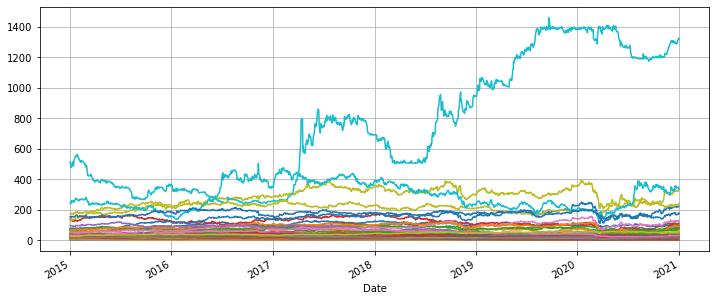

In [61]:
#Grafico de históricos diarios
closes.plot(figsize=(12,5), grid=True, legend=False)

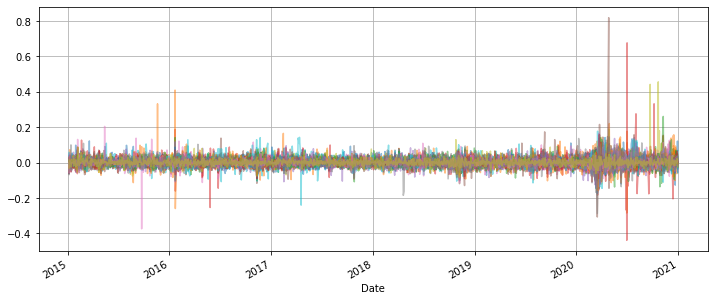

In [62]:
#Grafico de rendimientos diarios
ret.plot(figsize=(12,5), grid=True, alpha=0.5, legend=False)

In [63]:
#Resumen en base anual
annual_ret_summary = pd.DataFrame({'Mean':252*ret.mean(),'Volatility':np.sqrt(252)*ret.std()}, index=ret.columns)
annual_ret_summary = annual_ret_summary[annual_ret_summary['Mean']>0]
annual_ret_summary

,Mean,Volatility
Symbols,,
AC.MX,0.052863,0.211834
AGUA.MX,0.064355,0.331633
ALPEKA.MX,0.040852,0.312020
AMXL.MX,0.039762,0.257517
ASURB.MX,0.147167,0.289462
AUTLANB.MX,0.012361,0.339768
AXTELCPO.MX,0.181571,0.389624
BACHOCOB.MX,0.080601,0.228733
BIMBOA.MX,0.062943,0.289144


In [64]:
#Delimitar a emisoras con rendimientos esperados positivos
emisoras = annual_ret_summary.index.values

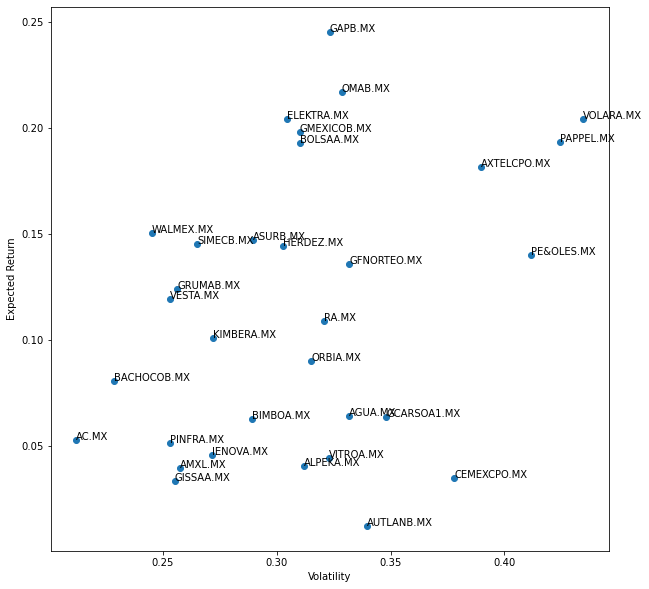

In [65]:
#Graficar rendimiento esperado vs volatilidad

#Puntos a graficar
x_points = annual_ret_summary.Volatility
y_points = annual_ret_summary.Mean

#Graficar
plt.figure(figsize=(10,10))
plt.plot(x_points,y_points,'o')
#Etiquetas de eje
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
#Etiquetas de instrumentos
for i in emisoras:
    plt.text(annual_ret_summary.loc[i,'Volatility'], annual_ret_summary.loc[i,'Mean'], i,rotation=0)
#plt.grid()

In [66]:
# Funcion objetivo y condicion inicial
def obj_fun(beta, Er, sigma):
    return ((Er - (beta[0]+beta[1]*sigma))**2).sum()

#beta_0 no es igual a beta[0]
beta_0 = [0,1]

In [67]:
# Resolver problema de optimizacion
solution = opt.minimize(obj_fun,beta_0, args=(y_points,x_points))
solution

AttributeError: 'Series' object has no attribute 'minimize'

In [ ]:
#Soluciones de la recta
beta = solution.x
beta

In [ ]:
#Graficar rendimiento esperado vs volatilidad

#Puntos a graficar
x_points = annual_ret_summary.Volatility
y_points = annual_ret_summary.Mean

#Graficar
plt.figure(figsize=(10,10))
plt.title('Volatilidad vs Rendimiento Esperado de Emisoras')
plt.plot(x_points,y_points,'o')
#Etiquetas de eje
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
#Etiquetas de instrumentos
for i in emisoras:
    plt.text(annual_ret_summary.loc[i,'Volatility'], annual_ret_summary.loc[i,'Mean'], i,rotation=0)
# Grafico recta ajustada
plt.plot(x_points, beta[0]+beta[1] * x_points, label='Recta Optima')
plt.legend()
plt.show()

In [ ]:
#Delimitar emisoras
opt = (y_points - (beta[0]+beta[1] * x_points))
emisoras = opt[opt > 0].index
emisoras

In [ ]:
#Graficar emisoras bursatiles
#Filtrar cierres de emisoras
closes = closes.loc[:,emisoras].dropna()
closes.head()

In [ ]:
#Rendimientos diarios
ret = closes.pct_change(1).dropna()
ret.head()

In [ ]:
#Graficar las correlaciones entre los activos
corrcoef = ret.corr()
f, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(corrcoef)